# Table of Contents
 <p><div class="lev1 toc-item"><a href="#What-is-Probability-Theory?" data-toc-modified-id="What-is-Probability-Theory?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is Probability Theory?</a></div><div class="lev2 toc-item"><a href="#A-simple-(?)-question" data-toc-modified-id="A-simple-(?)-question-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A simple (?) question</a></div><div class="lev2 toc-item"><a href="#Simulating-coin-flips" data-toc-modified-id="Simulating-coin-flips-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulating coin flips</a></div><div class="lev2 toc-item"><a href="#Summary" data-toc-modified-id="Summary-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Summary</a></div><div class="lev1 toc-item"><a href="#What-is-probability-theory?" data-toc-modified-id="What-is-probability-theory?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is probability theory?</a></div>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# What is Probability Theory?

* Probability Theory is a **mathematical** framework for computing the probability of complex events.

* Under the assumption that **we know the probabilities of the basic events.**

* What is the precise meaning of <font color='red'>"probability"</font> and <font color='red'>"event"</font>?

* We will give precise definitions later in the class. 

* For now, we'll rely on common sense.

## A simple (?) question
We all know that if one flips a fair coin then the outcome is "heads" or "tails" with equal probabilities.

What does that mean? 

It means that if we flip the coin $k$ times, for some large value of $k$, say $k=10,000$, 

Then the number of "heads" is **about** $\frac{k}{2}=\frac{10,000}{2} = 5,000$

What do we mean by **about** ??

## Simulating coin flips

We will use the pseudo random number generators in `numpy` to simulate the coin flips. 

instead of "Heads" and "Tails" we will use $x_i=1$ or $x_i=-1$ and consider the sum $S_{10000} = x_1+x_2+\cdots+x_{10000}$.

If the number of heads is about 5,000 then $S_{10000}\approx 0$

We will vary the number of coin flips, which we denote by $k$

In [3]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    X=2*(random.rand(k,n)>0.5)-1  # generate a kXn matrix of +-1 random numbers
    S=sum(X,axis=0) 
    return S 

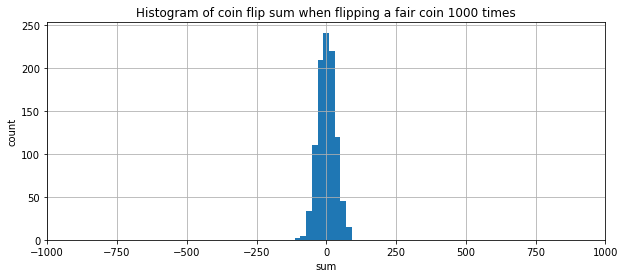

In [4]:
k=1000
n=1000
counts=generate_counts(k=k,n=n)
figure(figsize=[10,4])
hist(counts);
xlim([-k,k])
xlabel("sum")
ylabel("count")
title("Histogram of coin flip sum when flipping a fair coin %d times"%k)
grid()

Note that the sum $S_{1000}$ is not **exactly** $0$, it is only **close to** $0$.

Using **probability theory** we can calculate **how small** is $\big|S_k\big|$

In a later lesson we will show that the probability that 
$$\big| S_k \big| \geq 4\sqrt{k}$$
is smaller than $2 \times 10^{-8}$ which is $0.000002\%$

Let's use our simulation to demonstrate that this is the case:

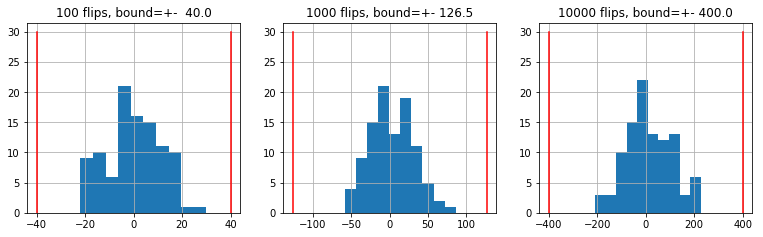

In [5]:
from math import sqrt
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


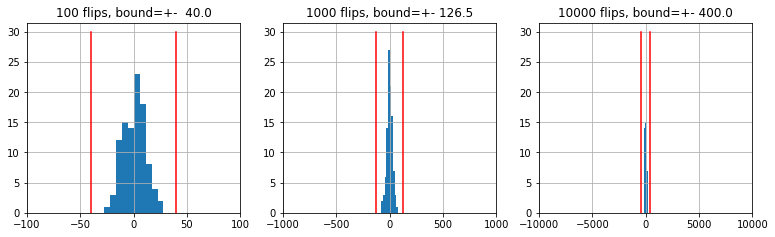

In [6]:
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    xlim([-k,k])
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


## Summary
We did some experiments summing $k$ random numbers: $S_k=x_1+x_2+\cdots+x_k$

$x_i=-1$ with probability $1/2$, $x_i=+1$ with probability $1/2$

Our experiments show that the sum $S_k$ is (almost) always in the range $\big[-4\sqrt{k},+4\sqrt{k}\big]$ 


$$\mbox{ If } k \to \infty,\;\;\; \frac{4 \sqrt{k}}{k} = \frac{4}{\sqrt{k}} \to 0$$

$$ \mbox{Therefor if }\;\;k \to \infty,  \frac{S_k}{k} \to 0$$

# What is probability theory?
It is the math involved in **proving** (a precise version of) the statements above.

In most cases, we can **approximate** probabilities using simulations (Monte-Carlo simulations)

Calculating the probabilities is better because:

* It provides a precise answer

* It is much faster than Monte Carlo simulations.

** <font size=4 > Up Next: What is Statistics ?</font> **